#### Module 9: Developing Web Maps and Representing Information Using Plots


In [32]:
# Approach to Solve
# You must use the fundamentals of Web Mapping and create three maps.

# Display the first 100 records from the data. The map will be saved in
# BasicWebMap.html – view it in browser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from IPython import display

df = pd.read_csv('C:\\Users\\pydev\\Downloads\\Police_Department_Incident_Reports__Historical_Jan_2016_to_Dec_2016.csv')
# df.head(2)
# df.shape
# df.Category.unique() # ROBBERY

1. For the latest 7 days of data, create a Web Map of crimes, categorized as
ROBBERY 

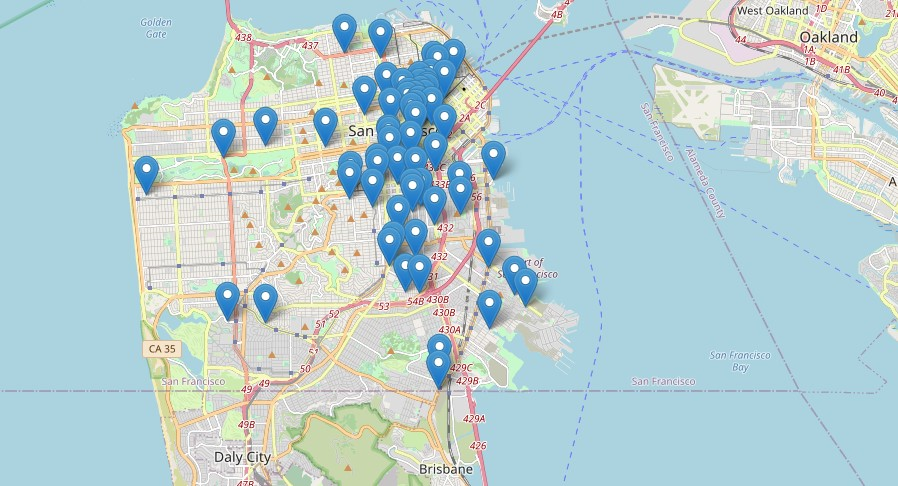

In [33]:
df_Robbery  = df[(df.Category=="ROBBERY")]
df_Robbery  = df_Robbery[["Date","X", "Y", "Category"]]
df_Robbery  = df_Robbery[(df_Robbery.Date >= "12/24/2016")] # The last 7 days of the year 2016

map = folium.Map(location=[df_Robbery.Y.mean(), df_Robbery.X.mean()], zoom_start=14, control_scale=True)
for index, location_info in df_Robbery.iterrows(): 
    folium.Marker([location_info["Y"], location_info["X"]], popup=location_info["Category"]).add_to(map)
    folium.Icon(color='green')
map.save("Robbery.html") 
# map
display.Image("Screenshot 2023-03-01 103941.jpg")

2. For the latest 15 days of data, create a Web Map of crimes, categorized as FRAUD
and GAMBLING. 

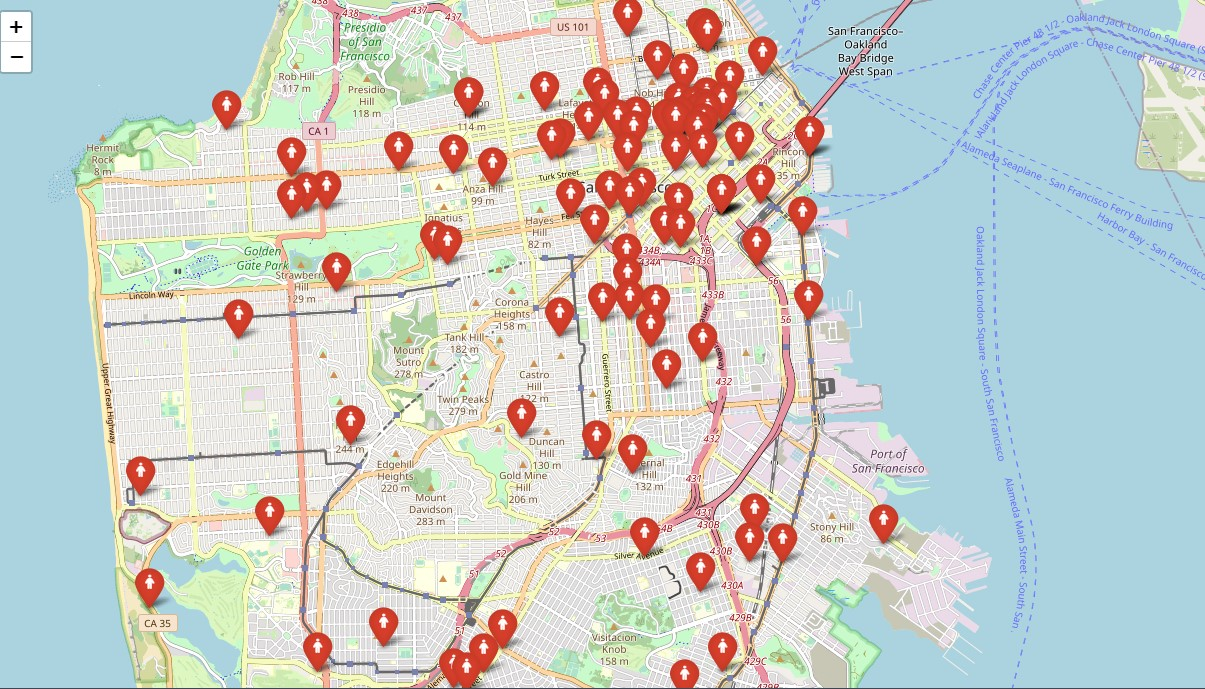

In [34]:
df_Fraud  = df[(df.Category=="FRAUD") | (df.Category=="GAMBLING")]
df_Fraud  = df_Fraud[["Date","X", "Y", "Category"]]
df_Fraud  = df_Fraud[(df_Fraud.Date >= "12/15/2016")] # The last 15 days of the year 2016

map = folium.Map(location=[df_Fraud.Y.mean(), df_Fraud.X.mean()], zoom_start=14, control_scale=True)
for index, location_info in df_Fraud.iterrows(): 
    folium.Marker([location_info["Y"], location_info["X"]], popup=location_info["Category"],
                  icon=folium.Icon(color="red",icon="person", prefix='fa')).add_to(map)
    
map.save("FraudAndGambling.html")     
# map    
display.Image("Screenshot 2023-03-01 112311.jpg")

3. BONUS ASSIGNMENT -- Display heatmap for Divvy Bikes. Divvy Bikes runs bike
rental services in Chicago, and their bike station geolocation data is shared.
Refer to BikesHeatMap.py, Divvy_Stations_2016_Q3.csv, and
Divvy_Stations_2016_Q4.csv

In [35]:
df_divvyBikes = pd.read_csv('D:\\workflow\\dt_learn_data_science\\edureka\\assignments\\solutions\\divvy-bicycle-stations-1.csv')


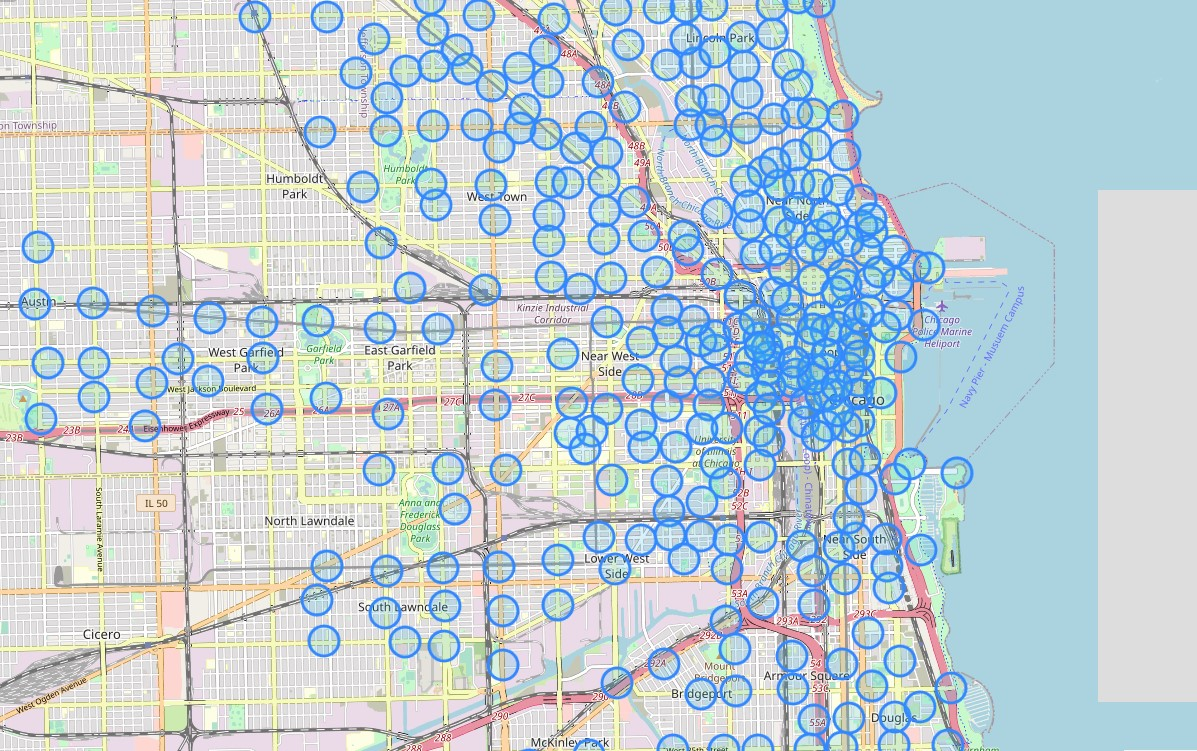

In [36]:
map       = folium.Map()
locations = [[row['Latitude'], row['Longitude']] for index, row in df_divvyBikes.iterrows()]
for index, row in df_divvyBikes.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], 
                        radius=15, popup=row["Station Name"], fill_color="#3db7e4").add_to(map)
map.save("BikeStationHeatMap.html")    
# map    
display.Image("Screenshot 2023-03-01 132957.jpg")